<a href="https://colab.research.google.com/github/BHRA2004/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy sklearn nltk matplotlib seaborn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
df = pd.read_csv('Twitter_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131332 entries, 0 to 131331
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  131331 non-null  object 
 1   category    131330 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [8]:
df = df[['clean_text', 'category']]
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [9]:
import re
def preprocess(text):
  if isinstance(text, str):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags symbol
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)
  else:
    return ''  # Or a placeholder like 'NaN_VALUE'
df['cleaned_text'] = df['clean_text'].apply(preprocess)


In [10]:
df.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,modi promised “ minimum government maximum gov...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


In [11]:
vectorizer = CountVectorizer()
df.dropna(subset=['category'], inplace=True)
# Convert 'category' to numeric if necessary
df['category'] = pd.to_numeric(df['category'], errors='coerce')  # 'coerce' will replace invalid values with NaN
df.dropna(subset=['category'], inplace=True)  # Drop newly created NaN values
# Ensure 'category' is of numeric type
df['category'] = df['category'].astype(int)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['category']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [20]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7183811771872383

Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.60      0.65      5807
           0       0.87      0.58      0.70      8887
           1       0.66      0.88      0.76     11572

    accuracy                           0.72     26266
   macro avg       0.75      0.69      0.70     26266
weighted avg       0.74      0.72      0.71     26266


Confusion Matrix:
 [[ 3467   347  1993]
 [  532  5165  3190]
 [  877   458 10237]]


In [ ]:
test_text = ["I love this product, it’s amazing!"]
test_text_processed = [preprocess(text) for text in test_text]
test_vectorized = vectorizer.transform(test_text_processed)
prediction = model.predict(test_vectorized)
print("Prediction:", prediction)


Prediction: [1]


In [ ]:
test_text = ["The product was broken."]
test_text_processed = [preprocess(text) for text in test_text]
test_vectorized = vectorizer.transform(test_text_processed)
prediction = model.predict(test_vectorized)
print("Prediction:", prediction)


Prediction: [-1]


In [ ]:
test_text = ["The sky is blue."]
test_text_processed = [preprocess(text) for text in test_text]
test_vectorized = vectorizer.transform(test_text_processed)
prediction = model.predict(test_vectorized)
print("Prediction:", prediction)


Prediction: [0]


In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train) # This line is crucial

y_pred = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9045252339315846

Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.82      0.85      7230
           0       0.90      0.96      0.93     10961
           1       0.92      0.90      0.91     14404

    accuracy                           0.90     32595
   macro avg       0.90      0.89      0.90     32595
weighted avg       0.90      0.90      0.90     32595


Confusion Matrix:
 [[ 5900   496   834]
 [  157 10558   246]
 [  647   732 13025]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_text = ["The sky is blue."]
test_text_processed = [preprocess(text) for text in test_text]
test_vectorized = vectorizer.transform(test_text_processed)
prediction = model1.predict(test_vectorized)
print("Prediction:", prediction)

Prediction: [0]


In [ ]:
test_text = ["Voting is important."]
test_text_processed = [preprocess(text) for text in test_text]
test_vectorized = vectorizer.transform(test_text_processed)
prediction = model1.predict(test_vectorized)
print("Prediction:", prediction)

Prediction: [1]


In [ ]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
model2.fit(X_train, y_train) # This line is crucial

y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9011504832029452

Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.83      0.85      7230
           0       0.90      0.95      0.92     10961
           1       0.92      0.90      0.91     14404

    accuracy                           0.90     32595
   macro avg       0.90      0.89      0.89     32595
weighted avg       0.90      0.90      0.90     32595


Confusion Matrix:
 [[ 5990   428   812]
 [  236 10376   349]
 [  701   696 13007]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train) # Add this line to fit the model to your training data
y_pred = model3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8585979444700107

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.64      0.75      7230
           0       0.84      0.96      0.90     10961
           1       0.87      0.89      0.88     14404

    accuracy                           0.86     32595
   macro avg       0.86      0.83      0.84     32595
weighted avg       0.86      0.86      0.85     32595


Confusion Matrix:
 [[ 4662   930  1638]
 [   61 10566   334]
 [  502  1144 12758]]


<ipython-input-12-b7365fb526a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


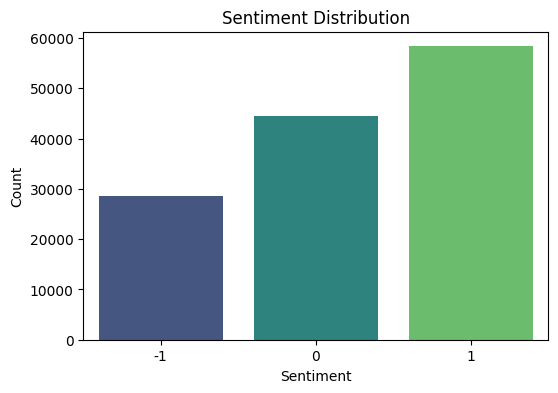

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your sentiment values are 0 (negative), 1 (positive), 2 (neutral) if applicable
plt.figure(figsize=(6, 4))
# Changed 'Category' to 'category'
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

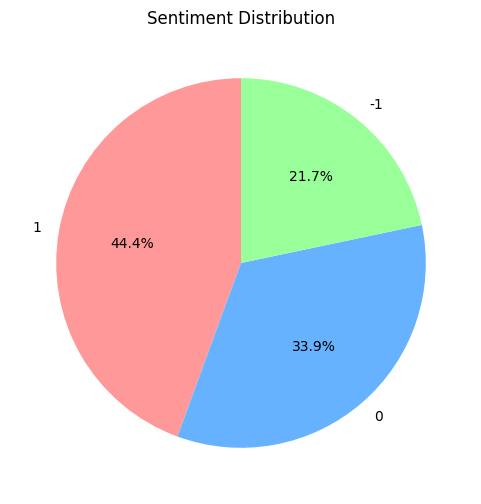

In [14]:
plt.figure(figsize=(6, 6))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [15]:
pip install wordcloud


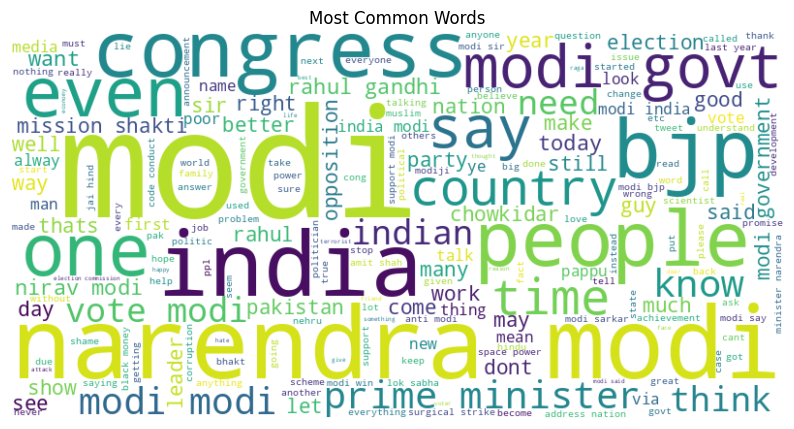

In [16]:
from wordcloud import WordCloud

text = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()


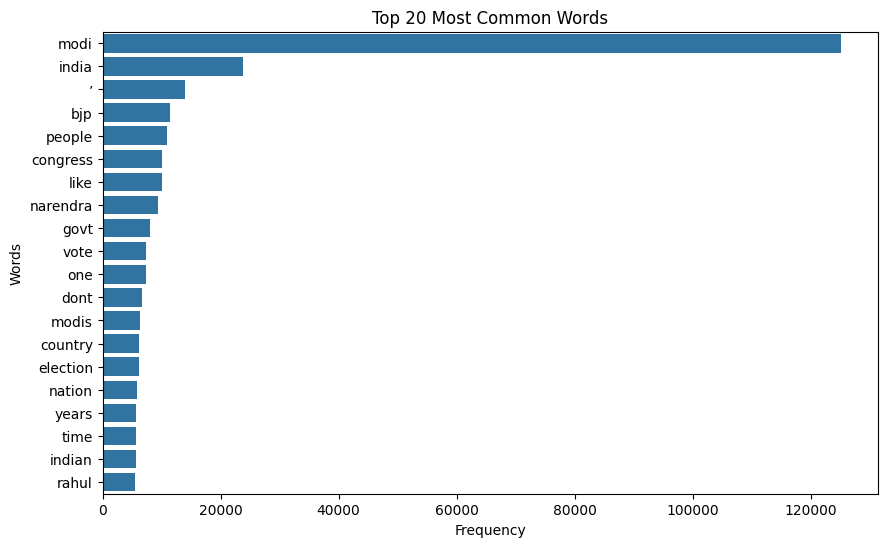

In [17]:
from collections import Counter

all_words = ' '.join(df['cleaned_text']).split()
word_counts = Counter(all_words)

common_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


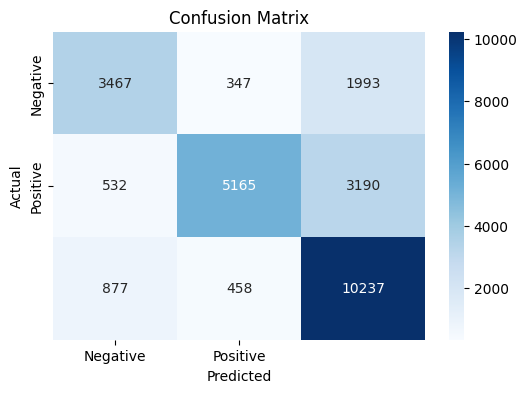

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
